# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
import csv
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_lngs = zip(lats, lngs)


In [23]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


552

In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
units ="Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=f6d186f5be61a18e5c72185e738ff21e&units=Imperial&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
units ="Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

search=[]
city_list=[]
country_list=[]

# lat_list=[]
# lng_list[]



row_count =0

for city in cities: 
    try:
        print(f"Record {row_count} -City:{city}")
        row_count+=1
        response= requests.get(query_url + city).json()
        country_name= response['sys']['country']
        city_id=response['id']
        
        search.append(response)
        city_list.append(city)
        country_list.append('countryName')
        
#         lat_data.append('lat')
#         lng_data.append('lng')
#         temp_data.append('temp')
#         humidity_data.append('humidity')
#         cloundiness_data.append('all')
#         wind_data.append('speed')
    except Exception as ex:
        print(f"Skip! The City: {city} is not found")
        pass
    
    if row_count % 50 == 0:
        time.sleep(30)
    
print("Processing complete!")
        
        

Record 0 -City:barentsburg
Skip! The City: barentsburg is not found
Record 1 -City:upernavik
Record 2 -City:portland
Record 3 -City:dingle
Record 4 -City:sobolevo
Record 5 -City:obarsia-closani
Skip! The City: obarsia-closani is not found
Record 6 -City:grindavik
Record 7 -City:hambantota
Record 8 -City:ushtobe
Record 9 -City:praia da vitoria
Record 10 -City:chuy
Record 11 -City:domoni
Skip! The City: domoni is not found
Record 12 -City:beringovskiy
Record 13 -City:mount gambier
Record 14 -City:vaini
Record 15 -City:bredasdorp
Record 16 -City:east london
Record 17 -City:zolotinka
Skip! The City: zolotinka is not found
Record 18 -City:busselton
Record 19 -City:pisco
Record 20 -City:chervonohryhorivka
Record 21 -City:karratha
Record 22 -City:beira
Record 23 -City:bluff
Record 24 -City:carmagnola
Record 25 -City:menongue
Record 26 -City:georgetown
Record 27 -City:marcona
Skip! The City: marcona is not found
Record 28 -City:biltine
Record 29 -City:punta arenas
Record 30 -City:hermanus
Reco

Record 278 -City:santa cecilia
Record 279 -City:puerto escondido
Record 280 -City:portoferraio
Record 281 -City:vacaria
Record 282 -City:kasulu
Record 283 -City:attawapiskat
Skip! The City: attawapiskat is not found
Record 284 -City:ferkessedougou
Record 285 -City:asau
Skip! The City: asau is not found
Record 286 -City:miri
Record 287 -City:bandundu
Record 288 -City:sabang
Record 289 -City:mohpa
Record 290 -City:erenhot
Record 291 -City:tumannyy
Skip! The City: tumannyy is not found
Record 292 -City:ayan
Record 293 -City:tela
Record 294 -City:pacific grove
Record 295 -City:sohag
Record 296 -City:vila franca do campo
Record 297 -City:longyearbyen
Record 298 -City:najran
Record 299 -City:bubaque
Record 300 -City:lavrentiya
Record 301 -City:artyom
Record 302 -City:rungata
Skip! The City: rungata is not found
Record 303 -City:tobermory
Record 304 -City:kaeo
Record 305 -City:nanortalik
Record 306 -City:yulara
Record 307 -City:rocha
Record 308 -City:nago
Record 309 -City:orlik
Record 310 -Ci

Record 537 -City:ereymentau
Record 538 -City:sestri levante
Record 539 -City:santa cruz de la palma
Record 540 -City:artyk
Skip! The City: artyk is not found
Record 541 -City:hvammstangi
Skip! The City: hvammstangi is not found
Record 542 -City:port hardy
Record 543 -City:xiashi
Record 544 -City:raga
Skip! The City: raga is not found
Record 545 -City:nichlaul
Record 546 -City:northam
Record 547 -City:werda
Record 548 -City:sheikh dannun
Record 549 -City:velingrad
Record 550 -City:mananara
Skip! The City: mananara is not found
Record 551 -City:kondopoga
Processing complete!


In [26]:
cloundiness_data=[data.get("clouds").get("all") for data in search]
humidity_data=[data.get("main").get("humidity") for data in search]
lat_data=[data.get("coord").get("lat") for data in search]
lng_data=[data.get("coord").get("lng") for data in search]
temp_data=[data.get("main").get("temp") for data in search]
wind_data=[data.get("wind").get("speed") for data in search]

weather_data=pd.DataFrame({"City": city_list,
                          "Country": country_list,
                          "Lat":lat_data,
                          "Lng": lng_data,
                          "Temp": temp_data,
                          "Humidity %": humidity_data,
                          "Cloundiness %": cloundiness_data,
                          "Wind Speed%": wind_data})


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_data.head()


,City,Country,Lat,Lng,Temp,Humidity %,Cloundiness %,Wind Speed%
0,upernavik,countryName,72.79,None,39.80,80,85,8.95
1,portland,countryName,43.66,None,61.63,93,1,4.18
2,dingle,countryName,11.00,None,89.48,57,6,3.98
3,sobolevo,countryName,54.43,None,54.20,82,15,16.15
4,grindavik,countryName,63.84,None,51.62,100,90,17.22


In [33]:
#export the city data into a CSV
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

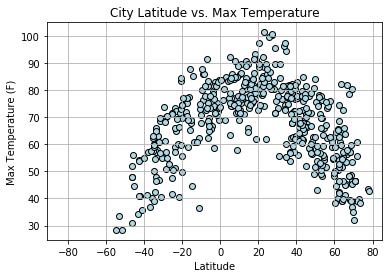

In [34]:
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

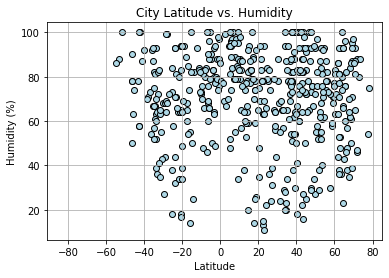

In [35]:
plt.scatter(weather_data["Lat"], weather_data["Humidity %"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

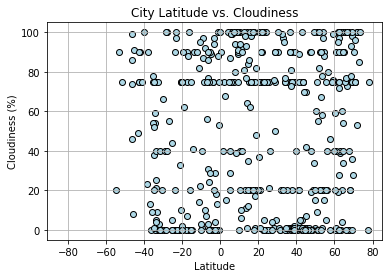

In [36]:
plt.scatter(weather_data["Lat"], weather_data["Cloundiness %"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

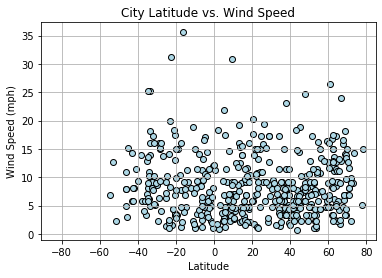

In [37]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed%"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Speed.png")

plt.show()